### inference script for LSTM

In [11]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Define LSTM model (same as training)
class SimpleLSTM(nn.Module):
    def __init__(self, input_size=3, hidden_size=256, num_classes=10, dropout=0.3):
        super(SimpleLSTM, self).__init__()
        
        # Single LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=2,
            batch_first=True,
            dropout=dropout  # No dropout for single layer
        )
        
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # x: (batch, 1000, 3)
        lstm_out, (h_n, c_n) = self.lstm(x)
        
        # Use last hidden state
        out = self.dropout(h_n[-1])  # (batch, hidden_size)
        out = self.fc(out)  # (batch, num_classes)
        
        return out

In [13]:
def load_prepared_data(data_dir='/Users/akashmurali/Documents/capstone/project/capture24/preprocessed', schema='WillettsSpecific2018'):
    """Load the preprocessed data"""
    print(f"Loading prepared data from: {data_dir}")
    
    X = np.load(os.path.join(data_dir, 'X.npy'))
    Y = np.load(os.path.join(data_dir, f'Y_{schema}.npy'), allow_pickle=True)
    T = np.load(os.path.join(data_dir, 'T.npy'), allow_pickle=True)
    P = np.load(os.path.join(data_dir, 'P.npy'), allow_pickle=True)
    
    print(f"\nLoaded data:")
    print(f"  X shape: {X.shape}")
    print(f"  Y shape: {Y.shape}")
    print(f"  Number of participants: {len(np.unique(P))}")
    
    return X, Y, T, P

In [14]:
def create_label_encoder(Y_train):
    """Create label encoder from training labels"""
    unique_labels = np.unique(Y_train)
    label_encoder = {label: idx for idx, label in enumerate(unique_labels)}
    idx_to_label = {idx: label for label, idx in label_encoder.items()}
    return label_encoder, idx_to_label


TESTING PARTICIPANT: P120
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P120:
  Windows: 5,114
  Duration: 14.21 hours
  Activities: ['household-chores' 'mixed-activity' 'sitting' 'sleep' 'standing'
 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 60.44%
  F1-Score: 0.2299
  Average Confidence: 0.539

Activity-wise Performance:
---------------------------------

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


--------------------------------------------------

TESTING PARTICIPANT: P125
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P125:
  Windows: 7,941
  Duration: 22.06 hours
  Activities: ['household-chores' 'manual-work' 'mixed-activity' 'sitting' 'sleep'
 'standing' 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 60.51%
  F1-Score: 0.2290
  Average Confidence: 0

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


--------------------------------------------------

TESTING PARTICIPANT: P130
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P130:
  Windows: 7,213
  Duration: 20.04 hours
  Activities: ['household-chores' 'mixed-activity' 'sitting' 'sleep' 'standing'
 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 58.57%
  F1-Score: 0.2816
  Average Confidence: 0.576

Activity

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


--------------------------------------------------

TESTING PARTICIPANT: P135
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P135:
  Windows: 5,489
  Duration: 15.25 hours
  Activities: ['household-chores' 'mixed-activity' 'sitting' 'sleep' 'standing'
 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 59.05%
  F1-Score: 0.2079
  Average Confidence: 0.555

Activity

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


--------------------------------------------------

TESTING PARTICIPANT: P140
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P140:
  Windows: 5,749
  Duration: 15.97 hours
  Activities: ['household-chores' 'manual-work' 'mixed-activity' 'sitting' 'sleep'
 'sports' 'standing' 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 41.28%
  F1-Score: 0.1652
  Average Conf

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


--------------------------------------------------

TESTING PARTICIPANT: P145
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P145:
  Windows: 7,232
  Duration: 20.09 hours
  Activities: ['bicycling' 'household-chores' 'mixed-activity' 'sitting' 'sleep'
 'standing' 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 45.01%
  F1-Score: 0.2073
  Average Confidence: 0.5

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"


--------------------------------------------------

OVERALL SUMMARY
Results for 6 participants:
Average Accuracy: 54.14% ± 7.88%
Average F1-Score: 0.2202 ± 0.0348

Per-participant results:
  P120:  60.4% accuracy, 0.2299 F1
  P125:  60.5% accuracy, 0.2290 F1
  P130:  58.6% accuracy, 0.2816 F1
  P135:  59.0% accuracy, 0.2079 F1
  P140:  41.3% accuracy, 0.1652 F1
  P145:  45.0% accuracy, 0.2073 F1

Best:  P125 (60.51%)
Worst: P140 (41.28%)


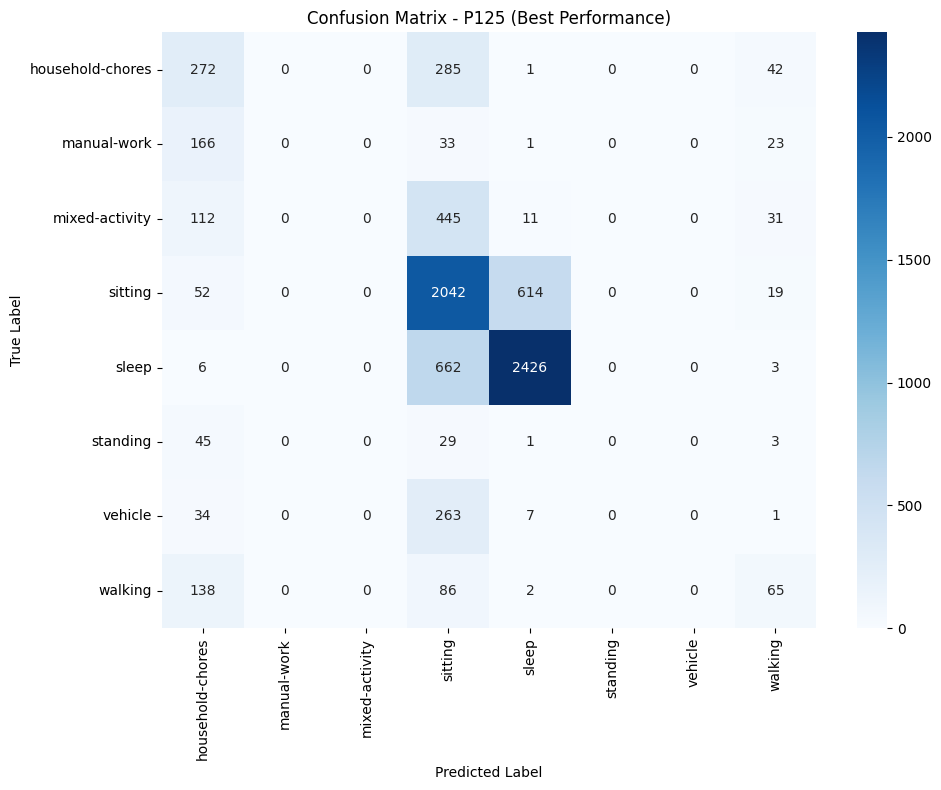

In [16]:
def run_lstm_inference(model_path, participant_id='P120', data_dir='/Users/akashmurali/Documents/capstone/project/capture24/preprocessed'):
    """
    Run inference on a specific participant using trained LSTM model
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Load data
    X_all, Y_all, T_all, P_all = load_prepared_data(data_dir)
    
    # Create label encoder from all available data (same as training would see)
    train_pids = [f'P{i:03d}' for i in range(1, 101)]  # Same as training
    train_mask = np.isin(P_all, train_pids)
    valid_train = train_mask & (Y_all != 'nan') & (~pd.isna(Y_all))
    Y_train = Y_all[valid_train]
    
    label_encoder, idx_to_label = create_label_encoder(Y_train)
    num_classes = len(label_encoder)
    
    print(f"\nLabel encoder created:")
    print(f"  Classes: {list(label_encoder.keys())}")
    print(f"  Number of classes: {num_classes}")
    
    # Load model
    print(f"\nLoading model from: {model_path}")
    
    if not os.path.exists(model_path):
        print(f"Model file not found: {model_path}")
        return None
    
    # Create model with same architecture as training
    model = SimpleLSTM(input_size=3, hidden_size=256, num_classes=num_classes, dropout=0.3)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()
    
    print("Model loaded successfully")
    
    # Filter for specific participant
    participant_mask = P_all == participant_id
    X_test = X_all[participant_mask]
    Y_test = Y_all[participant_mask]
    
    if len(X_test) == 0:
        available_participants = np.unique(P_all)
        test_participants = [p for p in available_participants if p.startswith('P1')]  # P101-P150 range
        print(f"No data found for participant {participant_id}")
        print(f"Available test participants: {test_participants}")
        return None
    
    # Remove NaN labels for evaluation
    valid_test = (Y_test != 'nan') & (~pd.isna(Y_test))
    X_test = X_test[valid_test]
    Y_test = Y_test[valid_test]
    
    print(f"\nParticipant {participant_id}:")
    print(f"  Windows: {len(X_test):,}")
    print(f"  Duration: {len(X_test) * 10 / 3600:.2f} hours")
    print(f"  Activities: {np.unique(Y_test)}")
    
    # Make predictions
    print("\nMaking predictions...")
    predictions = []
    confidences = []
    
    with torch.no_grad():
        # Process in batches for efficiency
        batch_size = 64
        for i in range(0, len(X_test), batch_size):
            batch = X_test[i:i+batch_size]
            batch_tensor = torch.FloatTensor(batch).to(device)
            
            outputs = model(batch_tensor)
            probs = torch.softmax(outputs, dim=1)
            
            preds = outputs.argmax(dim=1).cpu().numpy()
            confs = probs.max(dim=1)[0].cpu().numpy()
            
            predictions.extend([idx_to_label[pred] for pred in preds])
            confidences.extend(confs)
    
    predictions = np.array(predictions)
    confidences = np.array(confidences)
    
    # Calculate overall accuracy
    accuracy = (predictions == Y_test).mean() * 100
    f1 = f1_score(Y_test, predictions, average='macro')
    
    print(f"\nOverall Performance:")
    print(f"  Accuracy: {accuracy:.2f}%")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Average Confidence: {confidences.mean():.3f}")
    
    # Activity-wise performance
    print(f"\nActivity-wise Performance:")
    print("-" * 60)
    
    for activity in sorted(np.unique(Y_test)):
        mask = Y_test == activity
        if mask.sum() > 0:
            act_accuracy = (predictions[mask] == Y_test[mask]).mean() * 100
            act_confidence = confidences[mask].mean()
            count = mask.sum()
            print(f"{activity:15s}: {act_accuracy:5.1f}% acc, {act_confidence:.3f} conf ({count:,} samples)")
    
    # Detailed classification report
    print(f"\nClassification Report:")
    print(classification_report(Y_test, predictions))
    
    # Show sample predictions
    print(f"\nSample Predictions:")
    print("-" * 90)
    
    # Show diverse samples
    indices = np.linspace(0, len(predictions)-1, min(15, len(predictions)), dtype=int)
    
    for i in indices:
        match = "✓" if predictions[i] == Y_test[i] else "✗"
        conf_str = f"({confidences[i]:.3f})"
        time_str = f"t={i*10//3600:02d}:{(i*10%3600)//60:02d}:{(i*10)%60:02d}"
        print(f"{match} {time_str} Window {i:5d}: Pred={predictions[i]:15s} {conf_str:8s} True={Y_test[i]:15s}")
    
    # Activity sequence visualization
    if len(predictions) > 50:
        print(f"\nActivity sequence (first 50 windows, 10-sec each):")
        print("Time:      ", " ".join([f"{i*10//60:02d}:{(i*10)%60:02d}" for i in range(0, 50, 5)]))
        pred_slice = predictions[:50:5]  # Every 5th prediction
        true_slice = Y_test[:50:5]
        
        print("Predicted: ", " ".join([p[:4] for p in pred_slice]))
        print("True:      ", " ".join([t[:4] for t in true_slice]))
    
    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': predictions,
        'true_labels': Y_test,
        'confidences': confidences,
        'participant': participant_id,
        'label_encoder': label_encoder
    }

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Set your model path
    model_path = '/Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth'  # Update this path
    
    # Test on multiple participants from the test set (P101-P150)
    test_participants = ['P120', 'P125', 'P130', 'P135', 'P140', 'P145']
    # test_participants = ['P120']
    
    all_results = {}
    
    for participant in test_participants:
        print("\n" + "="*90)
        print(f"TESTING PARTICIPANT: {participant}")
        print("="*90)
        
        try:
            result = run_lstm_inference(
                model_path=model_path,
                participant_id=participant,
                data_dir='/Users/akashmurali/Documents/capstone/project/capture24/preprocessed'
            )
            
            if result:
                all_results[participant] = result
                
        except Exception as e:
            print(f"Error processing {participant}: {e}")
            continue
        
        print("\n" + "-"*50)
    
    # Overall summary
    if all_results:
        print("\n" + "="*90)
        print("OVERALL SUMMARY")
        print("="*90)
        
        accuracies = [r['accuracy'] for r in all_results.values()]
        f1_scores = [r['f1_score'] for r in all_results.values()]
        
        print(f"Results for {len(all_results)} participants:")
        print(f"Average Accuracy: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}%")
        print(f"Average F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
        
        print(f"\nPer-participant results:")
        for pid, result in all_results.items():
            print(f"  {pid}: {result['accuracy']:5.1f}% accuracy, {result['f1_score']:.4f} F1")
        
        best_participant = max(all_results.keys(), key=lambda k: all_results[k]['accuracy'])
        worst_participant = min(all_results.keys(), key=lambda k: all_results[k]['accuracy'])
        
        print(f"\nBest:  {best_participant} ({all_results[best_participant]['accuracy']:.2f}%)")
        print(f"Worst: {worst_participant} ({all_results[worst_participant]['accuracy']:.2f}%)")
        
        # Plot confusion matrix for best participant
        if len(all_results) > 0:
            best_result = all_results[best_participant]
            unique_labels = sorted(np.unique(best_result['true_labels']))
            
            plot_confusion_matrix(
                best_result['true_labels'], 
                best_result['predictions'],
                unique_labels,
                f"Confusion Matrix - {best_participant} (Best Performance)"
            )


TESTING PARTICIPANT: P120
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P120:
  Windows: 5,114
  Duration: 14.21 hours
  Activities: ['household-chores' 'mixed-activity' 'sitting' 'sleep' 'standing'
 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 75.13%
  F1-Score: 0.4748
  Average Confidence: 0.692

Activity-wise Performance:
---------------------------------

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"


--------------------------------------------------

TESTING PARTICIPANT: P125
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P125:
  Windows: 7,941
  Duration: 22.06 hours
  Activities: ['household-chores' 'manual-work' 'mixed-activity' 'sitting' 'sleep'
 'standing' 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 70.56%
  F1-Score: 0.3030
  Average Confidence: 0

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


--------------------------------------------------

TESTING PARTICIPANT: P130
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P130:
  Windows: 7,213
  Duration: 20.04 hours
  Activities: ['household-chores' 'mixed-activity' 'sitting' 'sleep' 'standing'
 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 68.67%
  F1-Score: 0.3661
  Average Confidence: 0.715

Activity

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is


--------------------------------------------------

TESTING PARTICIPANT: P135
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P135:
  Windows: 5,489
  Duration: 15.25 hours
  Activities: ['household-chores' 'mixed-activity' 'sitting' 'sleep' 'standing'
 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 63.20%
  F1-Score: 0.2945
  Average Confidence: 0.689

Activity

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is


--------------------------------------------------

TESTING PARTICIPANT: P140
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P140:
  Windows: 5,749
  Duration: 15.97 hours
  Activities: ['household-chores' 'manual-work' 'mixed-activity' 'sitting' 'sleep'
 'sports' 'standing' 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 50.67%
  F1-Score: 0.2467
  Average Conf

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is


--------------------------------------------------

TESTING PARTICIPANT: P145
Using device: cpu
Loading prepared data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed

Loaded data:
  X shape: (934762, 1000, 3)
  Y shape: (934762,)
  Number of participants: 151

Label encoder created:
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Number of classes: 10

Loading model from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
Model loaded successfully

Participant P145:
  Windows: 7,232
  Duration: 20.09 hours
  Activities: ['bicycling' 'household-chores' 'mixed-activity' 'sitting' 'sleep'
 'standing' 'vehicle' 'walking']

Making predictions...

Overall Performance:
  Accuracy: 66.37%
  F1-Score: 0.3851
  Average Confidence: 0.7

/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/akashmurali/anaconda3/envs/har/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is


--------------------------------------------------

OVERALL SUMMARY
Results for 6 participants:
Average Accuracy: 65.77% ± 7.68%
Average F1-Score: 0.3450 ± 0.0740

Per-participant results:
  P120:  75.1% accuracy, 0.4748 F1
  P125:  70.6% accuracy, 0.3030 F1
  P130:  68.7% accuracy, 0.3661 F1
  P135:  63.2% accuracy, 0.2945 F1
  P140:  50.7% accuracy, 0.2467 F1
  P145:  66.4% accuracy, 0.3851 F1

Best:  P120 (75.13%)
Worst: P140 (50.67%)


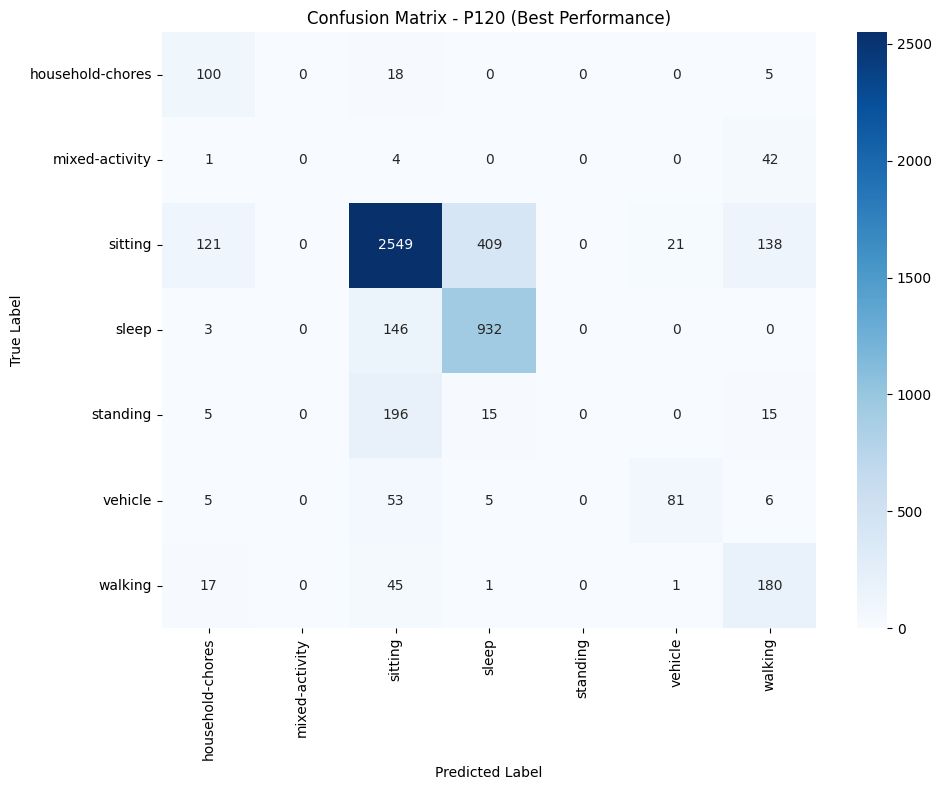

In [19]:
def run_lstm_inference(model_path, participant_id='P120', data_dir='/Users/akashmurali/Documents/capstone/project/capture24/preprocessed'):
    """
    Run inference on a specific participant using trained LSTM model
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Load data
    X_all, Y_all, T_all, P_all = load_prepared_data(data_dir)
    
    # Create label encoder from all available data (same as training would see)
    train_pids = [f'P{i:03d}' for i in range(1, 101)]  # Same as training
    train_mask = np.isin(P_all, train_pids)
    valid_train = train_mask & (Y_all != 'nan') & (~pd.isna(Y_all))
    Y_train = Y_all[valid_train]
    
    label_encoder, idx_to_label = create_label_encoder(Y_train)
    num_classes = len(label_encoder)
    
    print(f"\nLabel encoder created:")
    print(f"  Classes: {list(label_encoder.keys())}")
    print(f"  Number of classes: {num_classes}")
    
    # Load model
    print(f"\nLoading model from: {model_path}")
    
    if not os.path.exists(model_path):
        print(f"Model file not found: {model_path}")
        return None
    
    # Create model with same architecture as training
    model = SimpleLSTM(input_size=3, hidden_size=256, num_classes=num_classes, dropout=0.3)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()
    
    print("Model loaded successfully")
    
    # Filter for specific participant
    participant_mask = P_all == participant_id
    X_test = X_all[participant_mask]
    Y_test = Y_all[participant_mask]
    
    if len(X_test) == 0:
        available_participants = np.unique(P_all)
        test_participants = [p for p in available_participants if p.startswith('P1')]  # P101-P150 range
        print(f"No data found for participant {participant_id}")
        print(f"Available test participants: {test_participants}")
        return None
    
    # Remove NaN labels for evaluation
    valid_test = (Y_test != 'nan') & (~pd.isna(Y_test))
    X_test = X_test[valid_test]
    Y_test = Y_test[valid_test]
    
    print(f"\nParticipant {participant_id}:")
    print(f"  Windows: {len(X_test):,}")
    print(f"  Duration: {len(X_test) * 10 / 3600:.2f} hours")
    print(f"  Activities: {np.unique(Y_test)}")
    
    # Make predictions
    print("\nMaking predictions...")
    predictions = []
    confidences = []
    
    with torch.no_grad():
        # Process in batches for efficiency
        batch_size = 128
        for i in range(0, len(X_test), batch_size):
            batch = X_test[i:i+batch_size]
            batch_tensor = torch.FloatTensor(batch).to(device)
            
            outputs = model(batch_tensor)
            probs = torch.softmax(outputs, dim=1)
            
            preds = outputs.argmax(dim=1).cpu().numpy()
            confs = probs.max(dim=1)[0].cpu().numpy()
            
            predictions.extend([idx_to_label[pred] for pred in preds])
            confidences.extend(confs)
    
    predictions = np.array(predictions)
    confidences = np.array(confidences)
    
    # Calculate overall accuracy
    accuracy = (predictions == Y_test).mean() * 100
    f1 = f1_score(Y_test, predictions, average='macro')
    
    print(f"\nOverall Performance:")
    print(f"  Accuracy: {accuracy:.2f}%")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Average Confidence: {confidences.mean():.3f}")
    
    # Activity-wise performance
    print(f"\nActivity-wise Performance:")
    print("-" * 60)
    
    for activity in sorted(np.unique(Y_test)):
        mask = Y_test == activity
        if mask.sum() > 0:
            act_accuracy = (predictions[mask] == Y_test[mask]).mean() * 100
            act_confidence = confidences[mask].mean()
            count = mask.sum()
            print(f"{activity:15s}: {act_accuracy:5.1f}% acc, {act_confidence:.3f} conf ({count:,} samples)")
    
    # Detailed classification report
    print(f"\nClassification Report:")
    print(classification_report(Y_test, predictions))
    
    # Show sample predictions
    print(f"\nSample Predictions:")
    print("-" * 90)
    
    # Show diverse samples
    indices = np.linspace(0, len(predictions)-1, min(15, len(predictions)), dtype=int)
    
    for i in indices:
        match = "✓" if predictions[i] == Y_test[i] else "✗"
        conf_str = f"({confidences[i]:.3f})"
        time_str = f"t={i*10//3600:02d}:{(i*10%3600)//60:02d}:{(i*10)%60:02d}"
        print(f"{match} {time_str} Window {i:5d}: Pred={predictions[i]:15s} {conf_str:8s} True={Y_test[i]:15s}")
    
    # Activity sequence visualization
    if len(predictions) > 50:
        print(f"\nActivity sequence (first 50 windows, 10-sec each):")
        print("Time:      ", " ".join([f"{i*10//60:02d}:{(i*10)%60:02d}" for i in range(0, 50, 5)]))
        pred_slice = predictions[:50:5]  # Every 5th prediction
        true_slice = Y_test[:50:5]
        
        print("Predicted: ", " ".join([p[:4] for p in pred_slice]))
        print("True:      ", " ".join([t[:4] for t in true_slice]))
    
    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': predictions,
        'true_labels': Y_test,
        'confidences': confidences,
        'participant': participant_id,
        'label_encoder': label_encoder
    }

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Set your model path
    model_path = '/Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth'  # Update this path
    
    # Test on multiple participants from the test set (P101-P150)
    test_participants = ['P120', 'P125', 'P130', 'P135', 'P140', 'P145']
    # test_participants = ['P120']
    
    all_results = {}
    
    for participant in test_participants:
        print("\n" + "="*90)
        print(f"TESTING PARTICIPANT: {participant}")
        print("="*90)
        
        try:
            result = run_lstm_inference(
                model_path=model_path,
                participant_id=participant,
                data_dir='/Users/akashmurali/Documents/capstone/project/capture24/preprocessed'
            )
            
            if result:
                all_results[participant] = result
                
        except Exception as e:
            print(f"Error processing {participant}: {e}")
            continue
        
        print("\n" + "-"*50)
    
    # Overall summary
    if all_results:
        print("\n" + "="*90)
        print("OVERALL SUMMARY")
        print("="*90)
        
        accuracies = [r['accuracy'] for r in all_results.values()]
        f1_scores = [r['f1_score'] for r in all_results.values()]
        
        print(f"Results for {len(all_results)} participants:")
        print(f"Average Accuracy: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}%")
        print(f"Average F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
        
        print(f"\nPer-participant results:")
        for pid, result in all_results.items():
            print(f"  {pid}: {result['accuracy']:5.1f}% accuracy, {result['f1_score']:.4f} F1")
        
        best_participant = max(all_results.keys(), key=lambda k: all_results[k]['accuracy'])
        worst_participant = min(all_results.keys(), key=lambda k: all_results[k]['accuracy'])
        
        print(f"\nBest:  {best_participant} ({all_results[best_participant]['accuracy']:.2f}%)")
        print(f"Worst: {worst_participant} ({all_results[worst_participant]['accuracy']:.2f}%)")
        
        # Plot confusion matrix for best participant
        if len(all_results) > 0:
            best_result = all_results[best_participant]
            unique_labels = sorted(np.unique(best_result['true_labels']))
            
            plot_confusion_matrix(
                best_result['true_labels'], 
                best_result['predictions'],
                unique_labels,
                f"Confusion Matrix - {best_participant} (Best Performance)"
            )

### HMM smoothing on LSTM model

In [22]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os
from sklearn.metrics import accuracy_score, f1_score, classification_report
from hmmlearn import hmm as hmm_lib

# ============================================================================
# STEP 1: DEFINE MODEL AND HELPER FUNCTIONS
# ============================================================================

class SimpleLSTM(nn.Module):
    def __init__(self, input_size=3, hidden_size=256, num_classes=10, dropout=0.3):
        super(SimpleLSTM, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=2,
            batch_first=True,
            dropout=dropout
        )
        
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        out = self.dropout(h_n[-1])
        out = self.fc(out)
        return out


def load_prepared_data(data_dir, schema='WillettsSpecific2018'):
    """Load preprocessed data"""
    print(f"Loading data from: {data_dir}")
    
    X = np.load(os.path.join(data_dir, 'X.npy'))
    Y = np.load(os.path.join(data_dir, f'Y_{schema}.npy'), allow_pickle=True)
    T = np.load(os.path.join(data_dir, 'T.npy'), allow_pickle=True)
    P = np.load(os.path.join(data_dir, 'P.npy'), allow_pickle=True)
    
    print(f"✓ Data loaded: X={X.shape}, Y={Y.shape}, P={len(np.unique(P))} participants")
    
    return X, Y, T, P


def create_label_encoder(Y_train):
    """Create label encoder"""
    unique_labels = np.unique(Y_train)
    label_encoder = {label: idx for idx, label in enumerate(unique_labels)}
    idx_to_label = {idx: label for label, idx in label_encoder.items()}
    return label_encoder, idx_to_label


def apply_hmm_smoothing(base_predictions, transition_matrix, n_classes):
    """Apply HMM smoothing"""
    hmm_model = hmm_lib.GaussianHMM(
        n_components=n_classes,
        covariance_type='diag',
        n_iter=100
    )
    
    hmm_model.transmat_ = transition_matrix
    hmm_model.startprob_ = np.ones(n_classes) / n_classes
    hmm_model.means_ = np.arange(n_classes).reshape(-1, 1)
    hmm_model.covars_ = np.ones((n_classes, 1)) * 0.5
    
    obs = base_predictions.reshape(-1, 1).astype(float)
    smoothed = hmm_model.predict(obs)
    
    return smoothed


# ============================================================================
# STEP 2: LOAD LSTM MODEL
# ============================================================================

print("="*70)
print("LOADING LSTM MODEL")
print("="*70)

MODEL_PATH = '/Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth'
DATA_DIR = '/Users/akashmurali/Documents/capstone/project/capture24/preprocessed'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# Load data
X_all, Y_all, T_all, P_all = load_prepared_data(DATA_DIR)

# Create label encoder from training data
train_pids = [f'P{i:03d}' for i in range(1, 101)]
train_mask = np.isin(P_all, train_pids)
valid_train = train_mask & (Y_all != 'nan') & (~pd.isna(Y_all))
Y_train = Y_all[valid_train]

label_encoder, idx_to_label = create_label_encoder(Y_train)
n_classes = len(label_encoder)

print(f"\nLabel encoder: {n_classes} classes")
print(f"  {list(label_encoder.keys())}")

# Load model
print(f"\nLoading LSTM from: {MODEL_PATH}")
model = SimpleLSTM(input_size=3, hidden_size=256, num_classes=n_classes, dropout=0.3)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device, weights_only=False))
model = model.to(device)
model.eval()

print("✓ LSTM model loaded")


# ============================================================================
# STEP 3: LEARN TRANSITION MATRIX FROM TRAINING SET
# ============================================================================

print("\n" + "="*70)
print("LEARNING TRANSITIONS FROM TRAINING DATA (P001-P100)")
print("="*70)

X_train = X_all[valid_train]
print(f"Training windows: {len(X_train):,}")

# Get predictions (subsample for speed)
sample_size = min(100000, len(X_train))
sample_indices = np.random.choice(len(X_train), sample_size, replace=False)
sample_indices = np.sort(sample_indices)  # Keep temporal order!

X_train_sample = X_train[sample_indices]
# X_train_sample = X_train

print(f"Getting predictions from {sample_size:,} windows...")
train_pred_idx = []

with torch.no_grad():
    batch_size = 64
    for i in range(0, len(X_train_sample), batch_size):
        batch = X_train_sample[i:i+batch_size]
        batch_tensor = torch.FloatTensor(batch).to(device)
        
        outputs = model(batch_tensor)
        preds = outputs.argmax(dim=1).cpu().numpy()
        train_pred_idx.extend(preds)

train_pred_idx = np.array(train_pred_idx)

# Learn transitions
print("Learning transition matrix...")
transitions = np.zeros((n_classes, n_classes))

for i in range(len(train_pred_idx) - 1):
    transitions[train_pred_idx[i], train_pred_idx[i+1]] += 1

transitions += 1.0
transitions = transitions / transitions.sum(axis=1, keepdims=True)

print(f"\n✓ Transition matrix learned")
print(f"Self-transition probabilities:")
for i in range(n_classes):
    print(f"  {idx_to_label[i]:20s}: {transitions[i, i]*100:.1f}%")


LOADING LSTM MODEL
Device: cpu
Loading data from: /Users/akashmurali/Documents/capstone/project/capture24/preprocessed
✓ Data loaded: X=(934762, 1000, 3), Y=(934762,), P=151 participants

Label encoder: 10 classes
  [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]

Loading LSTM from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/time-series/lstm_100p.pth
✓ LSTM model loaded

LEARNING TRANSITIONS FROM TRAINING DATA (P001-P100)
Training windows: 626,314
Getting predictions from 100,000 windows...
Learning transition matrix...

✓ Transition matrix learned
Self-transition probabilities:
  bicycling           : 76.6%
  household-chores    : 49.6%
  manual-work         : 25.8%
  mixed-activity      : 50.4%
  sitting             : 77.5%
  sleep               : 88.9%
  sports              : 62.

In [23]:
# ============================================================================
# STEP 4: TEST ON MULTIPLE PARTICIPANTS WITH HMM
# ============================================================================

print("\n" + "="*70)
print("TESTING ON MULTIPLE PARTICIPANTS")
print("="*70)

test_participants = ['P120', 'P125', 'P130', 'P135', 'P140']

all_results = []

for participant_id in test_participants:
    print(f"\n{'='*70}")
    print(f"PARTICIPANT: {participant_id}")
    print(f"{'='*70}")
    
    # Get participant data
    participant_mask = P_all == participant_id
    valid_mask = participant_mask & (Y_all != 'nan') & (~pd.isna(Y_all))
    
    X_test = X_all[valid_mask]
    Y_test = Y_all[valid_mask]
    
    if len(X_test) == 0:
        print(f"No data for {participant_id}")
        continue
    
    print(f"Windows: {len(X_test):,}, Duration: {len(X_test)*10/3600:.2f} hours")
    
    # Get base predictions
    print("Getting base predictions...")
    base_pred_idx = []
    true_idx = []
    
    with torch.no_grad():
        batch_size = 64
        for i in range(0, len(X_test), batch_size):
            batch = X_test[i:i+batch_size]
            batch_tensor = torch.FloatTensor(batch).to(device)
            
            outputs = model(batch_tensor)
            preds = outputs.argmax(dim=1).cpu().numpy()
            base_pred_idx.extend(preds)
        
        for label in Y_test:
            true_idx.append(label_encoder[label])
    
    base_pred_idx = np.array(base_pred_idx)
    true_idx = np.array(true_idx)
    
    # Base accuracy
    base_accuracy = accuracy_score(true_idx, base_pred_idx)
    base_f1 = f1_score(true_idx, base_pred_idx, average='macro')
    
    # Apply HMM smoothing
    print("Applying HMM smoothing...")
    smoothed_pred_idx = apply_hmm_smoothing(base_pred_idx, transitions, n_classes)
    
    # HMM accuracy
    hmm_accuracy = accuracy_score(true_idx, smoothed_pred_idx)
    hmm_f1 = f1_score(true_idx, smoothed_pred_idx, average='macro')
    
    # Changes
    changes = (base_pred_idx != smoothed_pred_idx).sum()
    corrections = ((base_pred_idx != true_idx) & (smoothed_pred_idx == true_idx)).sum()
    new_errors = ((base_pred_idx == true_idx) & (smoothed_pred_idx != true_idx)).sum()
    
    # Results
    print(f"\nResults for {participant_id}:")
    print(f"  Base LSTM:  Acc={base_accuracy*100:.2f}%, F1={base_f1:.4f}")
    print(f"  LSTM + HMM: Acc={hmm_accuracy*100:.2f}%, F1={hmm_f1:.4f}")
    print(f"  Improvement: +{(hmm_accuracy - base_accuracy)*100:.2f}%")
    print(f"  Changes: {changes}, Corrections: {corrections}, New errors: {new_errors}")
    
    all_results.append({
        'participant': participant_id,
        'n_windows': len(X_test),
        'base_accuracy': base_accuracy * 100,
        'hmm_accuracy': hmm_accuracy * 100,
        'improvement': (hmm_accuracy - base_accuracy) * 100,
        'base_f1': base_f1,
        'hmm_f1': hmm_f1,
        'changes': changes,
        'corrections': corrections
    })


# ============================================================================
# STEP 5: SUMMARY
# ============================================================================

print("\n" + "="*70)
print("OVERALL SUMMARY: LSTM + HMM")
print("="*70)

results_df = pd.DataFrame(all_results)
print("\n" + results_df.to_string(index=False))

print(f"\nAggregate Statistics:")
print(f"  Average base accuracy: {results_df['base_accuracy'].mean():.2f}%")
print(f"  Average HMM accuracy: {results_df['hmm_accuracy'].mean():.2f}%")
print(f"  Average improvement: +{results_df['improvement'].mean():.2f}%")
print(f"  Total corrections: {results_df['corrections'].sum()}")

# Save results
results_df.to_csv('lstm_hmm_results.csv', index=False)
print(f"\n✓ Results saved to lstm_hmm_results.csv")


TESTING ON MULTIPLE PARTICIPANTS

PARTICIPANT: P120
Windows: 5,114, Duration: 14.21 hours
Getting base predictions...
Applying HMM smoothing...

Results for P120:
  Base LSTM:  Acc=75.13%, F1=0.4748
  LSTM + HMM: Acc=79.84%, F1=0.4941
  Improvement: +4.71%
  Changes: 438, Corrections: 320, New errors: 79

PARTICIPANT: P125
Windows: 7,941, Duration: 22.06 hours
Getting base predictions...
Applying HMM smoothing...

Results for P125:
  Base LSTM:  Acc=70.56%, F1=0.3030
  LSTM + HMM: Acc=71.36%, F1=0.3345
  Improvement: +0.81%
  Changes: 421, Corrections: 214, New errors: 150

PARTICIPANT: P130
Windows: 7,213, Duration: 20.04 hours
Getting base predictions...
Applying HMM smoothing...

Results for P130:
  Base LSTM:  Acc=68.67%, F1=0.3661
  LSTM + HMM: Acc=69.46%, F1=0.3669
  Improvement: +0.79%
  Changes: 351, Corrections: 159, New errors: 102

PARTICIPANT: P135
Windows: 5,489, Duration: 15.25 hours
Getting base predictions...
Applying HMM smoothing...

Results for P135:
  Base LSTM:  A

In [24]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os
from sklearn.metrics import accuracy_score, f1_score, classification_report
from hmmlearn import hmm as hmm_lib

# ============================================================================
# STEP 1: DEFINE CNN MODEL
# ============================================================================

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10, dropout=0.5):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv1d(3, 64, kernel_size=7, padding=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(2)
        
        self.conv2 = nn.Conv1d(64, 128, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(2)
        
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.MaxPool1d(2)
        
        self.gap = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(256, num_classes)
        
    def forward(self, x):
        x = x.transpose(1, 2)
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        x = self.gap(x).squeeze(-1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


def load_prepared_data(data_dir, schema='WillettsSpecific2018'):
    """Load preprocessed data"""
    print(f"Loading data from: {data_dir}")
    
    X = np.load(os.path.join(data_dir, 'X.npy'))
    Y = np.load(os.path.join(data_dir, f'Y_{schema}.npy'), allow_pickle=True)
    T = np.load(os.path.join(data_dir, 'T.npy'), allow_pickle=True)
    P = np.load(os.path.join(data_dir, 'P.npy'), allow_pickle=True)
    
    print(f"✓ Data loaded: X={X.shape}, Y={Y.shape}")
    
    return X, Y, T, P


def apply_hmm_smoothing(base_predictions, transition_matrix, n_classes):
    """Apply HMM smoothing"""
    hmm_model = hmm_lib.GaussianHMM(
        n_components=n_classes,
        covariance_type='diag',
        n_iter=100
    )
    
    hmm_model.transmat_ = transition_matrix
    hmm_model.startprob_ = np.ones(n_classes) / n_classes
    hmm_model.means_ = np.arange(n_classes).reshape(-1, 1)
    hmm_model.covars_ = np.ones((n_classes, 1)) * 0.5
    
    obs = base_predictions.reshape(-1, 1).astype(float)
    smoothed = hmm_model.predict(obs)
    
    return smoothed


# ============================================================================
# STEP 2: LOAD CNN MODEL
# ============================================================================

print("="*70)
print("LOADING CNN MODEL")
print("="*70)

MODEL_PATH = '/Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/cnn/best_model.pth'
DATA_DIR = '/Users/akashmurali/Documents/capstone/project/capture24/preprocessed'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# Load model
print(f"Loading CNN from: {MODEL_PATH}")
checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=False)

model = SimpleCNN(num_classes=10, dropout=0.5)
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)
model.eval()

label_encoder = checkpoint['label_encoder']
idx_to_label = {idx: label for label, idx in label_encoder.items()}
n_classes = len(label_encoder)

print(f"✓ CNN model loaded")
print(f"  Classes: {list(label_encoder.keys())}")
print(f"  Val accuracy: {checkpoint.get('val_acc', 'N/A'):.2f}%")

LOADING CNN MODEL
Device: cpu
Loading CNN from: /Users/akashmurali/Documents/capstone/project/HAR/human-activity-recognition/cnn/best_model.pth
✓ CNN model loaded
  Classes: [np.str_('bicycling'), np.str_('household-chores'), np.str_('manual-work'), np.str_('mixed-activity'), np.str_('sitting'), np.str_('sleep'), np.str_('sports'), np.str_('standing'), np.str_('vehicle'), np.str_('walking')]
  Val accuracy: 75.44%


In [25]:
print("\n" + "="*70)
print("TESTING CNN + HMM ON MULTIPLE PARTICIPANTS")
print("="*70)

# Test participants
test_participants = ['P120', 'P125', 'P130', 'P135', 'P140', 'P145']

all_results = []

for participant_id in test_participants:
    print(f"\n{'='*70}")
    print(f"PARTICIPANT: {participant_id}")
    print(f"{'='*70}")
    
    # Get participant data
    participant_mask = P_all == participant_id
    valid_mask = participant_mask & (Y_all != 'nan') & (~pd.isna(Y_all))
    
    X_test = X_all[valid_mask]
    Y_test = Y_all[valid_mask]
    
    if len(X_test) == 0:
        print(f"No data for {participant_id}")
        continue
    
    print(f"Windows: {len(X_test):,}, Duration: {len(X_test)*10/3600:.2f} hours")
    
    # Get base CNN predictions
    print("Getting CNN predictions...")
    base_pred_idx = []
    true_idx = []
    
    with torch.no_grad():
        batch_size = 64
        for i in range(0, len(X_test), batch_size):
            batch = X_test[i:i+batch_size]
            batch_tensor = torch.FloatTensor(batch).to(device)
            
            outputs = model(batch_tensor)
            preds = outputs.argmax(dim=1).cpu().numpy()
            base_pred_idx.extend(preds)
        
        for label in Y_test:
            true_idx.append(label_encoder[label])
    
    base_pred_idx = np.array(base_pred_idx)
    true_idx = np.array(true_idx)
    
    # Base accuracy
    base_accuracy = accuracy_score(true_idx, base_pred_idx)
    base_f1 = f1_score(true_idx, base_pred_idx, average='macro')
    
    # Apply HMM smoothing
    print("Applying HMM smoothing...")
    smoothed_pred_idx = apply_hmm_smoothing(base_pred_idx, transitions, n_classes)
    
    # HMM accuracy
    hmm_accuracy = accuracy_score(true_idx, smoothed_pred_idx)
    hmm_f1 = f1_score(true_idx, smoothed_pred_idx, average='macro')
    
    # Analyze changes
    changes = (base_pred_idx != smoothed_pred_idx).sum()
    corrections = ((base_pred_idx != true_idx) & (smoothed_pred_idx == true_idx)).sum()
    new_errors = ((base_pred_idx == true_idx) & (smoothed_pred_idx != true_idx)).sum()
    
    # Count segments
    base_segments = sum(1 for i in range(1, len(base_pred_idx)) 
                       if base_pred_idx[i] != base_pred_idx[i-1]) + 1
    hmm_segments = sum(1 for i in range(1, len(smoothed_pred_idx)) 
                      if smoothed_pred_idx[i] != smoothed_pred_idx[i-1]) + 1
    
    # Results
    print(f"\nResults for {participant_id}:")
    print(f"  Base CNN:   Acc={base_accuracy*100:.2f}%, F1={base_f1:.4f}, Segments={base_segments}")
    print(f"  CNN + HMM:  Acc={hmm_accuracy*100:.2f}%, F1={hmm_f1:.4f}, Segments={hmm_segments}")
    print(f"  Improvement: +{(hmm_accuracy - base_accuracy)*100:.2f}%")
    print(f"  Changes: {changes}, Corrections: {corrections}, New errors: {new_errors}")
    
    all_results.append({
        'participant': participant_id,
        'n_windows': len(X_test),
        'duration_hours': len(X_test) * 10 / 3600,
        'base_accuracy': base_accuracy * 100,
        'hmm_accuracy': hmm_accuracy * 100,
        'improvement': (hmm_accuracy - base_accuracy) * 100,
        'base_f1': base_f1,
        'hmm_f1': hmm_f1,
        'base_segments': base_segments,
        'hmm_segments': hmm_segments,
        'changes': changes,
        'corrections': corrections,
        'new_errors': new_errors
    })


# ============================================================================
# STEP 6: SUMMARY
# ============================================================================

print("\n" + "="*70)
print("OVERALL SUMMARY: CNN + HMM")
print("="*70)

results_df = pd.DataFrame(all_results)
print("\n" + results_df.to_string(index=False))

print(f"\nAggregate Statistics:")
print(f"  Average base accuracy: {results_df['base_accuracy'].mean():.2f}%")
print(f"  Average HMM accuracy: {results_df['hmm_accuracy'].mean():.2f}%")
print(f"  Average improvement: +{results_df['improvement'].mean():.2f}%")
print(f"  Total corrections: {results_df['corrections'].sum()}")
print(f"  Total new errors: {results_df['new_errors'].sum()}")
print(f"  Net gain: {results_df['corrections'].sum() - results_df['new_errors'].sum()}")

print(f"\nSegment Reduction:")
print(f"  Average base segments: {results_df['base_segments'].mean():.0f}")
print(f"  Average HMM segments: {results_df['hmm_segments'].mean():.0f}")
print(f"  Reduction: {(1 - results_df['hmm_segments'].mean()/results_df['base_segments'].mean())*100:.1f}%")

# Save results
results_df.to_csv('cnn_hmm_results.csv', index=False)
print(f"\n✓ Results saved to cnn_hmm_results.csv")


TESTING CNN + HMM ON MULTIPLE PARTICIPANTS

PARTICIPANT: P120
Windows: 5,114, Duration: 14.21 hours
Getting CNN predictions...
Applying HMM smoothing...

Results for P120:
  Base CNN:   Acc=67.23%, F1=0.4278, Segments=1364
  CNN + HMM:  Acc=71.27%, F1=0.4335, Segments=650
  Improvement: +4.05%
  Changes: 521, Corrections: 336, New errors: 129

PARTICIPANT: P125
Windows: 7,941, Duration: 22.06 hours
Getting CNN predictions...
Applying HMM smoothing...

Results for P125:
  Base CNN:   Acc=70.91%, F1=0.3451, Segments=1382
  CNN + HMM:  Acc=71.92%, F1=0.3765, Segments=796
  Improvement: +1.01%
  Changes: 510, Corrections: 230, New errors: 150

PARTICIPANT: P130
Windows: 7,213, Duration: 20.04 hours
Getting CNN predictions...
Applying HMM smoothing...

Results for P130:
  Base CNN:   Acc=68.63%, F1=0.4222, Segments=1759
  CNN + HMM:  Acc=68.86%, F1=0.4681, Segments=1307
  Improvement: +0.24%
  Changes: 426, Corrections: 162, New errors: 145

PARTICIPANT: P135
Windows: 5,489, Duration: 15.2